# Building instance segmentation

## Roboflow

In [1]:
! pip install -qq roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00


In [2]:
from roboflow import Roboflow

In [3]:
rf = Roboflow(api_key="WfFyWMBEy23EmhYC7sRY")
project = rf.workspace("roboflow-universe-projects").project("buildings-instance-segmentation")
version = project.version(1)

loading Roboflow workspace...
loading Roboflow project...


In [4]:
dataset = version.download("yolov8-obb")


Extracting Dataset Version Zip to Buildings-Instance-Segmentation-1 in yolov8-obb:: 100%|██████████| 19342/19342 [00:03<00:00, 5367.28it/s]


In [5]:
! ls

Buildings-Instance-Segmentation-1  sample_data


## YOLO

In [6]:
! pip install -qq ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 4.5 MB/s eta 0:00:00


In [7]:
from ultralytics import YOLO

In [8]:
model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.73M/6.73M [00:00<00:00, 86.0MB/s]


### YOLO training

In [9]:
yaml_content = f'''
path: /content/Buildings-Instance-Segmentation-1/

train: train/images
val: valid/images
test: test/images

names:
  0: Building
'''

with open('data.yaml', 'w') as f:
    f.write(yaml_content)

In [11]:
results = model.train(
    batch=32,
    device="cuda",
    data="data.yaml",
    epochs=8,
)

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=data.yaml, epochs=8, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

100%|██████████| 755k/755k [00:00<00:00, 16.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 82.1MB/s]


AMP: checks passed ✅


train: Scanning /content/Buildings-Instance-Segmentation-1/train/labels... 6764 images, 832 backgrounds, 71 corrupt: 100%|██████████| 6764/6764 [00:09<00:00, 688.51it/s]

train: WARNING ⚠️ /content/Buildings-Instance-Segmentation-1/train/images/Donetsk_2022_R1C8_10500_11000_11000_11500_jpg.rf.5e303bfae0d9fa99f1249706a10f8e52.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0779      1.0498]
train: WARNING ⚠️ /content/Buildings-Instance-Segmentation-1/train/images/Donetsk_2022_R2C10_15500_16000_500_1000_jpg.rf.e359abc641ed0bf3be651cfff01983cc.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0037]
train: WARNING ⚠️ /content/Buildings-Instance-Segmentation-1/train/images/Donetsk_2022_R2C7_3500_4000_14000_14500_jpg.rf.fdbe19d7e5ecb6ca4f1b47e6d0d52100.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0055]
train: WARNING ⚠️ /content/Buildings-Instance-Segmentation-1/train/images/Donetsk_2022_R2C8_15000_15500_4500_5000_jpg.rf.c7729a4ad6f18ab8720007d89fe0f482.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0118

train: New cache created: /content/Buildings-Instance-Segmentation-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Buildings-Instance-Segmentation-1/valid/labels... 1934 images, 203 backgrounds, 28 corrupt: 100%|██████████| 1934/1934 [00:05<00:00, 356.22it/s]

val: WARNING ⚠️ /content/Buildings-Instance-Segmentation-1/valid/images/Donetsk_2022_R2C9_14000_14500_13500_14000_jpg.rf.3a457483b23fbfe9ee631361633e04a6.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0116]
val: WARNING ⚠️ /content/Buildings-Instance-Segmentation-1/valid/images/Donetsk_2022_R5C5_14000_14500_10000_10500_jpg.rf.0c1cf141a5103ff3770d26c07e370c44.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1042]
val: WARNING ⚠️ /content/Buildings-Instance-Segmentation-1/valid/images/Donetsk_2022_R6C4_13500_14000_9500_10000_jpg.rf.e2b0f87ca6b37884757f80c418d91d96.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0648      1.0176]
val: WARNING ⚠️ /content/Buildings-Instance-Segmentation-1/valid/images/Donetsk_2022_R6C4_14000_14500_10000_10500_jpg.rf.28dd5bea3bc7a2e2cebfa4f63bd6d057.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1113]
v

val: New cache created: /content/Buildings-Instance-Segmentation-1/valid/labels.cache
Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train2
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/8      10.4G      1.689      2.785      1.781      1.375        119        640: 100%|██████████| 210/210 [05:58<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:38<00:00,  1.27s/it]


                   all       1906      25918      0.517      0.476       0.47      0.256      0.486       0.44      0.415      0.171

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/8      9.76G      1.598      2.566      1.413      1.328        102        640: 100%|██████████| 210/210 [06:10<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:40<00:00,  1.35s/it]


                   all       1906      25918      0.556      0.527      0.526      0.291      0.541      0.505      0.492      0.219

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/8      9.52G      1.562      2.511       1.35      1.308         56        640: 100%|██████████| 210/210 [06:13<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:41<00:00,  1.40s/it]


                   all       1906      25918      0.606       0.53      0.547      0.296      0.581        0.5      0.503      0.219

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        4/8      11.2G      1.524      2.463      1.285       1.29         85        640: 100%|██████████| 210/210 [06:04<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:38<00:00,  1.29s/it]


                   all       1906      25918      0.644      0.583      0.615      0.353      0.624      0.557      0.577      0.271

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        5/8      9.15G      1.491        2.4       1.25      1.273        170        640: 100%|██████████| 210/210 [05:58<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:37<00:00,  1.26s/it]


                   all       1906      25918      0.659      0.602      0.645      0.378      0.641      0.579      0.611      0.294

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        6/8      9.99G      1.455       2.34      1.207      1.254         87        640: 100%|██████████| 210/210 [05:52<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:39<00:00,  1.33s/it]


                   all       1906      25918      0.655      0.619      0.649      0.381      0.646      0.593      0.618      0.299

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        7/8      9.79G       1.42      2.281      1.164      1.234         99        640: 100%|██████████| 210/210 [05:50<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:38<00:00,  1.28s/it]


                   all       1906      25918      0.697      0.616      0.672      0.406      0.681      0.591      0.642      0.322

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        8/8      7.64G      1.392      2.233      1.134      1.218         48        640: 100%|██████████| 210/210 [05:52<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:38<00:00,  1.29s/it]


                   all       1906      25918      0.714      0.625      0.694       0.43      0.696      0.601      0.662      0.339

8 epochs completed in 0.902 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 6.8MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [01:04<00:00,  2.15s/it]


                   all       1906      25918      0.715      0.624      0.694       0.43      0.696      0.601      0.662      0.339
Speed: 0.3ms preprocess, 3.2ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/segment/train2


## YOLO save

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Change locale

In [14]:
import locale
print(locale.getpreferredencoding())

ANSI_X3.4-1968


In [15]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [16]:
import locale
print(locale.getpreferredencoding())

UTF-8


### Saving

In [17]:
! cp runs/segment/train2/weights/best.pt /content/drive/MyDrive/colab_files/dronuniver_yolov8.pt

In [18]:
! mkdir /content/drive/MyDrive/colab_files/dron_training/
! cp runs/segment/train2/*.* /content/drive/MyDrive/colab_files/dron_training/

## YOLO tests

In [19]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
! cp -r /content/drive/MyDrive/colab_files/piter_images/ .

In [49]:
def predict_for(img_name, title=None):
    img = Image.open(img_name)
    res = model(img)[0]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(img)
    ax2.imshow(res.plot())
    plt.suptitle(title)

    plt.savefig('predicted_' + img_name.split('/')[-1])


0: 544x640 9 Buildings, 34.7ms
Speed: 13.7ms preprocess, 34.7ms inference, 20.2ms postprocess per image at shape (1, 3, 544, 640)


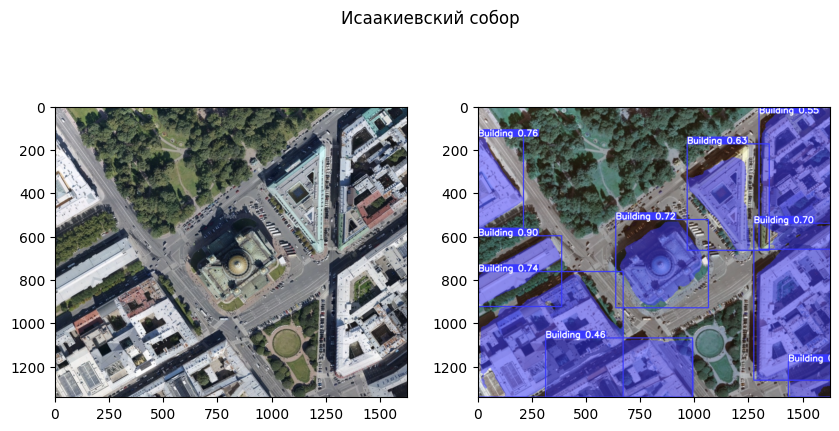

In [50]:
predict_for('piter_images/isakiy.png', 'Исаакиевский собор')


0: 608x640 18 Buildings, 21.4ms
Speed: 4.2ms preprocess, 21.4ms inference, 8.9ms postprocess per image at shape (1, 3, 608, 640)


Glyph 129304 (\N{SIGN OF THE HORNS}) missing from current font.
Glyph 129304 (\N{SIGN OF THE HORNS}) missing from current font.


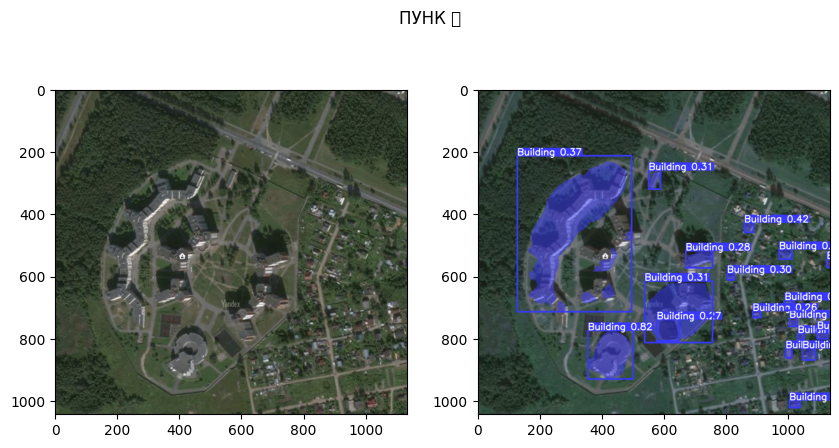

In [51]:
predict_for('piter_images/punk.png', 'ПУНК 🤘')


0: 640x640 14 Buildings, 22.9ms
Speed: 4.8ms preprocess, 22.9ms inference, 8.2ms postprocess per image at shape (1, 3, 640, 640)


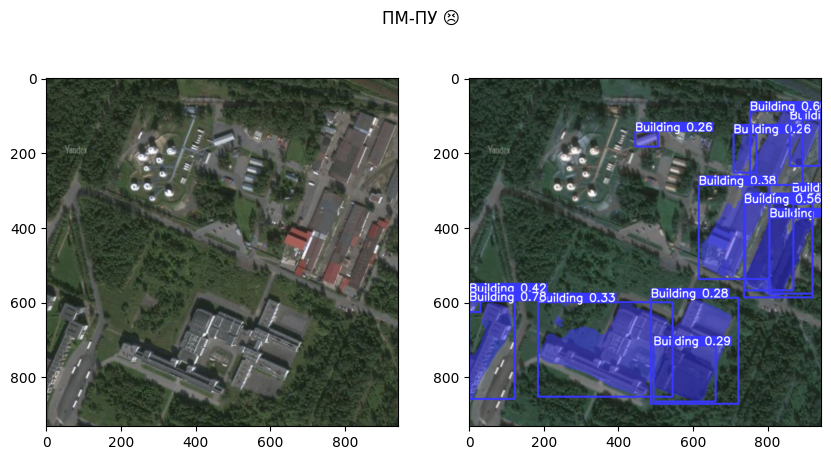

In [52]:
predict_for('piter_images/pm.png', 'ПМ-ПУ 😣')